In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#데이터 불러오기
df = pd.read_csv('c:/data/credit/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 정상거래 || 1: 사기거래)')

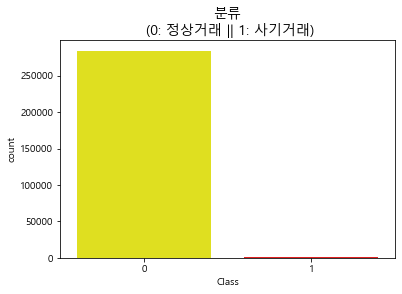

In [15]:
#비정상거래가 압도적으로 적은 불균형 데이터셋
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors = ['yellow', 'red']

sns.countplot('Class', data=df, palette=colors)
plt.title('분류\n (0: 정상거래 || 1: 사기거래)', fontsize=14)

In [7]:
print('사기거래')
print(df.Amount[df.Class == 1].describe())
print()
print('정상거래')
print(df.Amount[df.Class == 0].describe())


사기거래
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [8]:
train_cols = df.columns[1:29]
print(train_cols)
X = df[train_cols] #독립변수
y = df['Amount'] #종속변수
print(df[train_cols].head())
print(y.head())

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V19       V20       V21       V22  \
0  0.098698  0.363787  0.090794  ...  0.403993  0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974  ... -0.145783 -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643  ... -2.261857  0.524980  0.247998  0.771679  

In [9]:
from sklearn.model_selection import train_test_split
#데이터셋 분할 >>> 학습용:검증용 = 8:2
#random_state: 난수 발생을 위한 seed의 인자값
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [12]:
#다중 회귀분석
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()

print('회귀계수\n', result.params)
print('R-squared\n', result.rsquared)
print('P values\n', result.pvalues)

#요약 결과 출력
result.summary()

회귀계수
 V1     -29.077774
V2     -80.491353
V3     -34.786660
V4      17.441432
V5     -70.013184
V6      40.548231
V7      80.329848
V8     -21.586714
V9     -10.073176
V10    -23.316097
V11      0.025479
V12     -2.388504
V13      1.330275
V14      8.806473
V15     -0.815916
V16     -1.115946
V17      2.152430
V18     10.638416
V19    -17.252755
V20    110.116566
V21     36.094754
V22    -22.334174
V23    -45.113623
V24      2.125285
V25    -22.953126
V26     -1.663935
V27     17.862358
V28      7.773148
dtype: float64
R-squared
 0.8156885071776012
P values
 V1      0.000000e+00
V2      0.000000e+00
V3      0.000000e+00
V4      0.000000e+00
V5      0.000000e+00
V6      0.000000e+00
V7      0.000000e+00
V8      0.000000e+00
V9      0.000000e+00
V10     0.000000e+00
V11     9.030051e-01
V12     4.982719e-29
V13     5.507416e-10
V14     0.000000e+00
V15     4.660981e-04
V16     4.604005e-06
V17     1.071465e-17
V18     0.000000e+00
V19     0.000000e+00
V20     0.000000e+00
V21     0.00000

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Amount   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                          4.501e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:54:27   Log-Likelihood:                     -1.7527e+06
No. Observations:              284807   AIC:                                  3.506e+06
Df Residuals:                  284779   BIC:                                  3.506e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V1           -29.0778      0.109   -266.886      0.000     -29.291     -28.864
V2           -80.4914      0.129   -622.837      0.000     -80.745     -80.238
V3           -34.7867      0.141   -247.162      0.000     -35.063     -34.511
V4            17.4414      0.151    115.718      0.000      17.146      17.737
V5           -70.0132      0.155   -452.828      0.000     -70.316     -69.710
V6            40.5482      0.160    253.140      0.000      40.234      40.862
V7            80.3298      0.173    465.668      0.000      79.992      80.668
V8           -21.5867      0.179   -120.814      0.000     -21.937     -21.237
V9           -10.0732      0.194    -51.858      0.000     -10.454      -9.692
V10          -23.3161      0.196   -118.965      0.000     -23.700     -22.932
V11            0.0255      0.209      0.122      0.903      -0.384       0.435
V12           -2.3885      0.214    -11.183      0.000      -2.807      -1.970
V13            1.3303      0.214      6.204      0.000       0.910       1.751
V14            8.8065      0.223     39.558      0.000       8.370       9.243
V15           -0.8159      0.233     -3.500      0.000      -1.273      -0.359
V16           -1.1159      0.244     -4.582      0.000      -1.593      -0.639
V17            2.1524      0.251      8.567      0.000       1.660       2.645
V18           10.6384      0.255     41.784      0.000      10.139      11.137
V19          -17.2528      0.262    -65.811      0.000     -17.767     -16.739
V20          110.1166      0.277    397.797      0.000     109.574     110.659
V21           36.0948      0.291    124.236      0.000      35.525      36.664
V22          -22.3342      0.294    -75.950      0.000     -22.911     -21.758
V23          -45.1136      0.342   -132.011      0.000     -45.783     -44.444
V24            2.1253      0.352      6.032      0.000       1.435       2.816
V25          -22.9531      0.409    -56.067      0.000     -23.756     -22.151
V26           -1.6639      0.443     -3.760      0.000      -2.531      -0.797
V27           17.8624      0.529     33.785      0.000      16.826      18.899
V28            7.7731      0.647     12.023      0.000       6.506       9.040
==============================================================================
Omnibus:                   475780.388   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      14550861272.517
Skew:                         -10.000   Prob(JB):                         0.00
Kurtosis:                    1110.143   Cond. No.                         5.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) sin

In [11]:
from sklearn.metrics import r2_score
pred = result.predict(X_test)
r2_score(y_test, pred)

0.8004697006681276

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [14]:
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 0.9166679569637542
검증용: 0.920240380985743
